In [1]:
import numpy as np
from scipy import stats
from scipy.stats import norm
import scipy.io
import scipy.signal as ss
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib qt
#%gui qt

In [2]:
##gathering cognitive test score of all subjects in on file
num_subjects=np.array([32,34,35,36,38,39,40,41,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,67,
             68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96])
cognitive_test_result=np.empty((0,2))
for i in range(len(num_subjects)):
    cog_test_result=np.load('s'+str(num_subjects[i])+'behaviour_score.npy')
    cog_test_result=cog_test_result.reshape((1,cog_test_result.shape[0]))
    cognitive_test_result=np.append(cognitive_test_result,cog_test_result,axis=0)
    
strict_manner=cognitive_test_result[:,0]
easy_manner=cognitive_test_result[:,1] 
strict_manner=stats.zscore(strict_manner)
easy_manner=stats.zscore(easy_manner)
probibilty_1=norm.pdf(strict_manner)
anomaly_cognitive_score=np.argwhere(probibilty_1<(np.mean(probibilty_1)/2))
#print(anomaly_cognitive_score)
cognitive_score_clean= np.delete(strict_manner,anomaly_cognitive_score)
cognitive_score_clean=stats.zscore(cognitive_score_clean) 
sort_index=np.argsort(cognitive_score_clean)
cognitive_score_sorted=np.empty(len(cognitive_score_clean))
for index in range(len(cognitive_score_clean)):
    cognitive_score_sorted[index]=cognitive_score_clean[sort_index[index]]
np.save('cognitive_score',cognitive_score_sorted)
np.save('cognitive_score_clean',cognitive_score_clean)

In [3]:
import numpy as np
from scipy import stats
from scipy.stats import norm
import scipy.io
import scipy.signal as ss
num_subjects=np.array([32,34,35,36,38,39,40,41,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,67,
             68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96])
##gathering power features of all subjects in one file
num_subjects_clean= np.delete(num_subjects,anomaly_cognitive_score)
power=np.empty((0,1764))

for i in range(len(num_subjects_clean)):
    cc=np.load('s'+str(num_subjects_clean[i])+'_band_power_all_band_2nd.npy')
    cc=cc.reshape((1,1764))
    power=np.append(power,cc,axis=0) 
    
##sort features according to sorted lables namely congnitive scores   
power_spectral=np.empty((len(num_subjects_clean),1764))
for idx in range(len(num_subjects_clean)):
    power_spectral[idx,:]=power[sort_index[idx],:]
    
##deleting some features that are far away from norml distribution
anomaly_index=np.array(0)
for j in range (1764):
    p1=norm.pdf(power_spectral[:,j])
    anomaly1=np.argwhere(p1<(np.mean(p1)/50))
    if len(anomaly1)>10 :
        anomaly_index=np.append(anomaly_index,j)
        anomaly_index.astype(int)   
power_spectral_del=np.delete(power_spectral,(anomaly_index),1)

##replacing features of some subjects which are away from normal distribution with the mean of that feature for all sunjects
for j in range (1764-len(anomaly_index)):
    p=norm.pdf(power_spectral_del[:,j])
    anomaly2=np.argwhere(p<(np.mean(p)/50))
    power_spectral_del[[anomaly2],j]=np.mean(power_spectral_del[:,j])
    
##calculating the z-score  of all features
normalized_power=np.empty(((len(num_subjects_clean)),(1764-len(anomaly_index))))
for n in range(1764-len(anomaly_index)):
    normalized_power[:,n]=stats.zscore(power_spectral_del[:,n])

np.save('normalized_power', normalized_power)
np.save('num_subjects_clean',num_subjects_clean)

In [4]:
import pandas as pd
ch=np.asarray(('Fp1','Fz','F3','F7','FT9','FC5','FC1','C3','T7','TP9','CP5','CP1','Pz','P3','P7','O1','Oz','O2','P4','P8','TP10',
                  'CP6','CP2','Cz','C4','T8','FT10','FC6','FC2','F4','F8','Fp2','AF7','AF3','AFz','F1','F5','FT7','FC3','C1',
                  'C5','TP7','CP3','P1','P5','PO7','PO3','POz','PO4','PO8','P6','P2','CPz','CP4','TP8','C6','C2','FC4','FT8',
                  'F6','AF8','AF4','F2'))
ch_adress= np.vstack((ch,ch,ch,ch,ch,ch,ch,ch,ch,ch,ch,ch,ch,ch,ch,ch,ch,ch,ch,ch,ch,ch,ch,ch,ch,ch,ch,ch))
ch_adress=ch_adress.reshape((1,1764))
ch_adress_del=np.empty((0,1448))
ch_adress_del=np.delete(ch_adress,(anomaly_index))

In [5]:
rhytm=np.asarray(('delta','theta','alpha','beta','h_beta','gamma','h_gamma','alpha_1','alpha_2','beta_1','beta_2',
               'beta_3','gamma_1','gamma_2','r_delta','r_theta','r_alpha','r_beta','r_h_beta','r_gamma','r_h_gamma',
               'r_alpha_1','r_alpha_2','r_beta_1','r_beta_2','r_beta_3','r_gamma_1','r_gamma_2',))
rhytm_adress= np.vstack((rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,
                     rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,
                     rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,rhytm,
                     rhytm,rhytm,rhytm))
rhytm_adress=rhytm_adress.T
rhytm_adress=rhytm_adress.reshape((1,1764))
rhytm_adress_del=np.delete(rhytm_adress,(anomaly_index))

In [7]:
address=np.vstack((rhytm_adress_del,ch_adress_del))

In [7]:
pearson_score=np.empty((1764-len(anomaly_index)))
for ii in range(1764-len(anomaly_index)):
    h1=scipy.stats.pearsonr(cognitive_score_sorted, normalized_power[:,ii])  
    corr=h1[0]
    pearson_score[ii]=corr
significant_corrolations_pearson=np.argwhere(pearson_score>0.4)
print(significant_corrolations_pearson)
np.save('sig_corr_pearson',significant_corrolations_pearson)

[[478]
 [571]
 [642]
 [666]
 [671]
 [689]]


In [9]:
for idd in range(len((significant_corrolations_pearson))):
    print(ch_adress_del[significant_corrolations_pearson[idd]])

['FC4']
['P6']
['Oz']
['CP2']
['P1']
['P5']
['P6']
['T7']
['TP9']
['O1']
['F5']
['FT7']
['C1']
['P1']
['FT9']
['AF7']
['Fz']
['P2']
['Oz']
['CP2']
['P1']
['F5']
['CP2']
['P6']
['P2']
['FC4']
['O1']
['CP2']
['P1']
['P5']
['P6']
['T7']
['F5']
['FT7']
['P1']
['Fz']
['F4']
['F8']
['F5']
['FC4']
['FT8']
['Fz']
['CP2']
['Cz']
['F4']
['P6']
['P2']
['FC4']
['O1']
['P1']
['P5']
['P6']
['TP9']
['O1']
['FT7']
['Fz']
['F3']
['T7']
['O1']
['CP2']
['Cz']
['F4']
['P2']
['FC4']


In [8]:
selected_feature_index=np.load('selected_feature_index.npy')
for idd in range(len((selected_feature_index))):
    print(ch_adress_del[selected_feature_index[idd]])

['P1']
['P5']
['P6']
['T7']
['TP9']
['O1']
['F5']
['FT7']
['P1']
['AF7']
['P6']
['TP10']
['P6']
['CP2']
['P5']
['P6']
['FT7']
['P1']
['FT8']
['Cz']
['F4']
['P5']
['P6']
['PO8']
['FC2']
['CP6']
['FT8']
['Fz']
['CP2']
['Cz']
['F4']
['P2']
['FC4']
['CP6']


In [26]:
for idd in range(len((significant_corrolations_pearson))):
    print((rhytm_adress_del[significant_corrolations_pearson[idd]]),
          (ch_adress_del[significant_corrolations_pearson[idd]]),
          (pearson_score[significant_corrolations_pearson[idd]]))

['delta'] ['FC4'] [0.30437329]
['theta'] ['P6'] [0.31167745]
['alpha'] ['Oz'] [0.31562802]
['alpha'] ['CP2'] [0.32199571]
['alpha'] ['P1'] [0.37187161]
['alpha'] ['P5'] [0.35490313]
['alpha'] ['P6'] [0.36325859]
['beta'] ['T7'] [0.32412953]
['beta'] ['TP9'] [0.33257528]
['beta'] ['O1'] [0.33470013]
['beta'] ['F5'] [0.32492472]
['beta'] ['FT7'] [0.34092394]
['beta'] ['C1'] [0.33096875]
['beta'] ['P1'] [0.33626292]
['h_beta'] ['FT9'] [0.33175064]
['h_beta'] ['AF7'] [0.33362362]
['gamma'] ['Fz'] [0.30296307]
['gamma'] ['P2'] [0.30535189]
['h_gamma'] ['Oz'] [0.3124221]
['h_gamma'] ['CP2'] [0.31015459]
['h_gamma'] ['P1'] [0.3115725]
['alpha_2'] ['F5'] [0.30791985]
['beta_1'] ['CP2'] [0.30649008]
['beta_1'] ['P6'] [0.42435554]
['beta_1'] ['P2'] [0.33545546]
['beta_1'] ['FC4'] [0.31830529]
['beta_2'] ['O1'] [0.32389855]
['beta_2'] ['CP2'] [0.35094067]
['beta_2'] ['P1'] [0.31047732]
['beta_2'] ['P5'] [0.33047217]
['beta_2'] ['P6'] [0.31969326]
['beta_3'] ['T7'] [0.31458506]
['beta_3'] ['F5'] [

In [125]:
for idd in range(len((significant_corrolations_pearson))):
    print((pearson_score[significant_corrolations_pearson[idd]]))

[0.30437329]
[0.31167745]
[0.31562802]
[0.32199571]
[0.37187161]
[0.35490313]
[0.36325859]
[0.32412953]
[0.33257528]
[0.33470013]
[0.32492472]
[0.34092394]
[0.33096875]
[0.33626292]
[0.33175064]
[0.33362362]
[0.30296307]
[0.30535189]
[0.3124221]
[0.31015459]
[0.3115725]
[0.30791985]
[0.30649008]
[0.42435554]
[0.33545546]
[0.31830529]
[0.32389855]
[0.35094067]
[0.31047732]
[0.33047217]
[0.31969326]
[0.31458506]
[0.35087329]
[0.40902241]
[0.39447117]
[0.31867376]
[0.32797816]
[0.35417615]
[0.35639686]
[0.32107178]
[0.42012388]
[0.31361821]
[0.33826155]
[0.42852582]
[0.44392487]
[0.4275299]
[0.34780814]
[0.35996636]
[0.32171433]
[0.32512712]
[0.37415595]
[0.3937969]
[0.32047369]
[0.35003089]
[0.30614403]
[0.31838353]
[0.32628942]
[0.35389369]
[0.30862524]
[0.30346207]
[0.30757468]
[0.31933674]
[0.32997782]
[0.32660604]


In [16]:
vv=np.empty(1764-len(anomaly_index))
for ii in range(1764-len(anomaly_index)):
    h1=scipy.stats.mstats.spearmanr(cognitive_score_sorted, normalized_power[:,ii])  
    corr=h1[0]
    vv[ii]=corr
    
signif_spearmanr=np.argwhere(vv>0.4)
print(signif_spearmanr)

[[671]
 [689]
 [695]]


In [113]:
for idd in range(len((signif_spearmanr))):
    print((ch_adress_del[signif_spearmanr[idd]]),(rhytm_adress_del[signif_spearmanr[idd]]))

['F4'] ['gamma_2']
['P6'] ['gamma_2']
['FC4'] ['gamma_2']


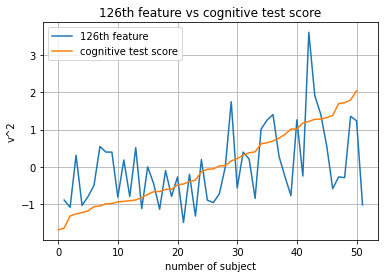

In [8]:
fig = plt.figure()
# Creating subplot/axes
ax = fig.add_subplot(111)
# Setting axes/plot title
ax.set_title('126th feature vs cognitive test score')
plt.plot(range(1,(len(cognitive_score_sorted)+1),1),normalized_power[:,478], cognitive_score_sorted)
# Setting X-axis and Y-axis labels
ax.set_ylabel('v^2')
ax.set_xlabel('number of subject')
ax.legend(['126th feature', 'cognitive test score'])
#plt. locator_params(nbins = 100)
plt.grid()
# Showing the plot
plt.show()


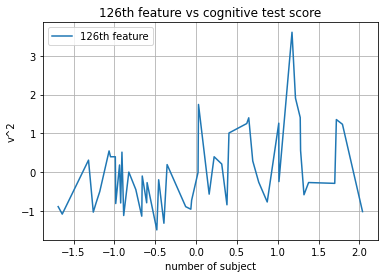

In [9]:
fig = plt.figure()
# Creating subplot/axes
ax = fig.add_subplot(111)
# Setting axes/plot title
ax.set_title('126th feature vs cognitive test score')
plt.plot(cognitive_score_sorted,normalized_power[:,478])
# Setting X-axis and Y-axis labels
ax.set_ylabel('v^2')
ax.set_xlabel('number of subject')
ax.legend(['126th feature', 'cognitive test score'])
#plt. locator_params(nbins = 100)
plt.grid()
# Showing the plot
plt.show()


In [25]:
from sklearn.metrics import mean_squared_error, r2_score
from sys import stdout
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
# Define PLS object
pls = PLSRegression(n_components=1) 
# Fit
pls.fit(normalized_power[:,[784]], cog_test)
# Cross-validation
y_cv = cross_val_predict(pls,normalized_power[:,[814]], cog_test, cv=10)
# Calculate scores
score = r2_score(cog_test, y_cv)
mse = mean_squared_error(cog_test, y_cv)
print(mse, score)
from sklearn.metrics import r2_score
fig = plt.figure()
# Creating subplot/axes
ax = fig.add_subplot(111)
# Setting axes/plot title
ax.set_title('pls_regression')
plt.plot(range(1,(len(cog_test)+1),1), cog_test, y_cv)
# Setting X-axis and Y-axis labels
ax.set_ylabel('Y-Axis Label')
ax.set_xlabel('X-Axis Label')
plt. locator_params(nbins = 100)
plt.grid()
# Showing the plot
plt.show()
print(mse, r2_score)

0.5189157842204732 -0.04549773679420732
0.5189157842204732 <function r2_score at 0x000001CDACF32040>


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(normalized_power,cog_test)
y_cv = cross_val_predict(LR,normalized_power, cog_test, cv=10)
# predicting the accuracy scor10
score=r2_score(cog_test,y_cv)
mse=mean_squared_error(cog_test,y_cv)
print(mse, score)


fig = plt.figure()

# Creating subplot/axes
ax = fig.add_subplot(111)

# Setting axes/plot title
ax.set_title('linear_regression')
plt.plot(range(1,(len(cog_test)+1),1), cog_test, y_cv)
# Setting X-axis and Y-axis labels
ax.set_ylabel('Y-Axis Label')
ax.set_xlabel('X-Axis Label')

# Showing the plot
plt.show()
print(mse,r2_score)

0.8729502281051457 -0.7587969292337986
0.8729502281051457 <function r2_score at 0x00000225F8C8DA60>


In [45]:
# importing libraries for polynomial transform
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(normalized_power,cog_test.reshape(-1,1))
y_cv = cross_val_predict(pipe,normalized_power,cog_test, cv=5)
# predicting the accuracy score
score=r2_score(cog_test,y_cv)
mse=mean_squared_error(cog_test,y_cv)
print(mse, score)

fig = plt.figure()
# Setting axes/plot title

# Creating subplot/axes
ax = fig.add_subplot(111)
ax.set_title('polynomial_regression')
plt.plot(range(1,(len(cog_test)+1),1), cog_test, y_cv)
# Showing the plot
plt.show()

3.895704417832788 -6.848961769744296


In [14]:
cog_test_devision=cognitive_test_result*10
cog_test_devision.shape

(61, 2)

In [16]:
cls1=()
cls2=()
cls3=()

for i in range(61) :
    x=cog_test_devision[i,1]
    if x<=3:
        cls1=np.append(cls1,i)
    if 7>x>3:
        cls2=np.append(cls2,i)
    else:
        cls3=np.append(cls3,i)
        

In [18]:
cls1

()

In [19]:
cls2

array([ 0.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 40.,
       41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
       54., 55., 56., 57., 58., 59., 60.])

In [23]:
cog_test_devision[:,1]

array([6.81703071, 7.36071542, 5.57708135, 3.3099082 , 4.29455524,
       6.28505856, 6.81386515, 5.57708135, 5.24849636, 5.85802469,
       4.66445078, 5.31212409, 5.19484014, 5.43304843, 6.09465021,
       5.57439063, 6.28917379, 4.36024058, 5.11095283, 5.32541944,
       4.59085154, 4.73646724, 6.60826211, 5.81718898, 4.98448876,
       5.87274454, 4.58768598, 5.81244065, 5.2532447 , 3.95077556,
       6.54685027, 5.5954416 , 6.48733777, 5.46612852, 4.71573283,
       6.13152896, 4.93352327, 3.91168091, 4.85675847, 7.27856917,
       5.99540994, 4.4985755 , 4.84694524, 5.47894903, 6.09670782,
       4.84836974, 4.5982906 , 5.86752137, 6.05729661, 4.9555239 ,
       5.03640393, 3.91737892, 6.36578031, 6.12250712, 4.86451409,
       5.71462488, 5.30246914, 6.39965179, 5.75451092, 5.48733777,
       6.75688509])

In [3]:
'Fp1','Fz','F3','F7','FT9','FC5','FC1','C3','T7','TP9','CP5','CP1','Pz','P3','P7','O1','Oz','O2','P4','P8','TP10',
  0    1    2    3     4     5     6     7    8    9     10    11   12   13   14   15   16   17   18   19    20
    
'CP6','CP2','Cz','C4','T8','FT10','FC6','FC2','F4','F8','Fp2','AF7','AF3','AFz','F1','F5','FT7','FC3','C1',
  21    22   23   24   25    26     27   28    29   30   31    32     33   34    35   36    37   38    39
    
'C5','TP7','CP3','P1','P5','PO7','PO3','POz','PO4','PO8','P6','P2','CPz','CP4','TP8','C6','C2','FC4','FT8',
40     41    42   43   44   45    46    47    48     49   50   51    52   53     54   55   56   57     58

'F6','AF8','AF4','F2'))
  59   60   61     62

(63,)